In [53]:
import numpy as np
import matplotlib.pyplot as plt
import random
import enum

# Задание 1

Решить линейную регрессию — найти прямую, которая описывает зависимость

N - количество осей (размерность) <br>
M - количество точек <br>
minValue - минимальное значение для иксов <br>
maxValue - максимальное значение для иксов

In [54]:
N = 3
M = 30
minValue = 0
maxValue = 5
EPS = 1e-5
K = 1e-3

class TypeOfOptimisation(enum.Enum):
    momentum = 0
    nesterov = 1
    RMSProp = 2
    AdaGrad = 3
    none = 4


In [55]:
def yRegression(B, X):
    return np.sum(X * B)

B_reg = []
for i in range(N + 1):
    bi = random.randint(-maxValue, maxValue)
    B_reg.append(bi)
B_reg = np.array(B_reg, dtype='float64')
print(B_reg)
XM = []
YM = []
YR = []
for i in range(M):
    X = [1]
    for j in range(N):
        X.append(i)
    X = np.array(X)
    rand_delta = random.randint(-maxValue, maxValue)
    Y_act = yRegression(B_reg, X) + 1 * rand_delta
    YM.append(Y_act)
    XM.append(np.array(X))
XM = np.array(XM, dtype='float64')
YM = np.array(YM)

def runSGD(typeOfOptimisation, withNormalization):
    B_start = np.array([0] * (N + 1), dtype='float64')
    YR = np.array([0] * M, dtype='float64')
    if withNormalization:
        X_norm = ZNormalization(XM)
        Y_norm = (YM - np.mean(YM)) / np.std(YM)
        BA_start = (B_reg - np.mean(B_reg)) / np.std(B_reg)
        BF_norm, \
        errors_norm, \
        YF_norm, \
        iterations = gradientDescent(1,
                                     X_norm,
                                     Y_norm,
                                     YR,
                                     B_start,
                                     TypeOfOptimisation.none,
                                     withNormalization=False)

        print(errors_norm[0], errors_norm[len(errors_norm) - 1])
        print("actual coefficients:     ", BA_start)
        print("calculated coefficients: ", BF_norm)
        print("number of iterations:    ", iterations)
        drawGraph(X_norm, Y_norm, YF_norm)
        drawErrorsGraphic(errors_norm, iterations)
    else:
        B_final, \
        errors, \
        YF, \
        iterations = gradientDescent(1,
                                     XM,
                                     YM,
                                     YR,
                                     B_start,
                                     typeOfOptimisation,
                                     withNormalization=True)

        print(errors[0], errors[len(errors) - 1])
        print("actual coefficients:     ", B_reg)
        print("calculated coefficients: ", B_final)
        print("number of iterations:    ", iterations)
        drawGraph(XM, YM, YF)
        drawErrorsGraphic(errors, iterations)

[2. 1. 4. 2.]


179.6454666666667 429029875263249.44
actual coefficients:      [2. 1. 4. 2.]
calculated coefficients:  [ 8.46445028e+14 -1.90679945e+13 -1.90679945e+13 -1.90679945e+13]
number of iterations:     1861


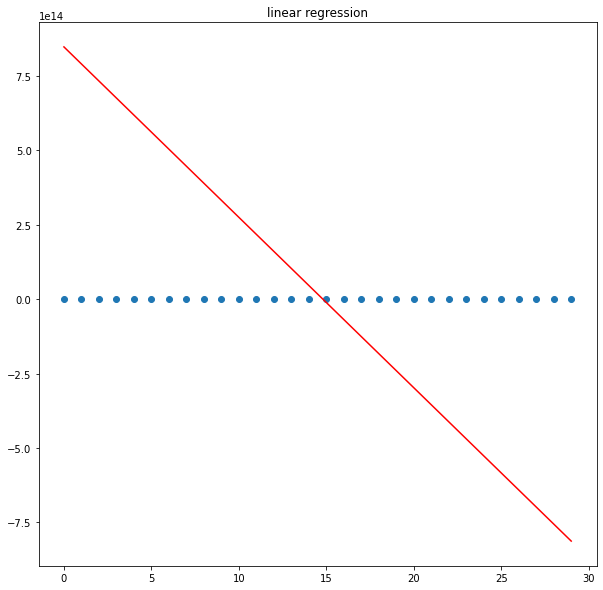

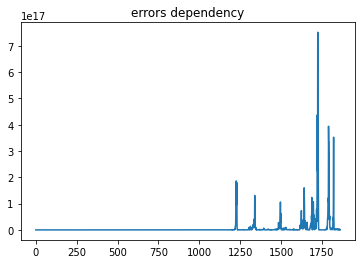

In [56]:
def squaredError(Y_act, Y_reg):
    return np.sum(abs(Y_act - Y_reg)) / M

def stoppingCriteria(previous, current, withNormalization):
    eps = EPS
    if withNormalization:
        eps /= 5
    return abs(previous - current) < eps

def gradient(nums, XM, YR, YM):
    grad = []
    for i in range(N + 1):
        xi = 0
        for j in range(len(nums)):
            xi += XM[nums[j]][i] * (YR[nums[j]] - YM[nums[j]])
        xi *= 2
        grad.append(xi)
    return np.array(grad)

def gradientDescent(batch, XM, YM, YR, B_reg, typeOfOptimisation, withNormalization):
    previousError = 0
    previousGradient = np.array([0] * (N + 1))
    errors = []
    iterations = 0
    while True:
        nums = set()
        while len(nums) != batch:
            x = random.randint(0, M - 1)
            if x not in nums:
                nums.add(x)

        nums = np.array(list(nums))
        if typeOfOptimisation == TypeOfOptimisation.none:
            grad = gradient(nums, XM, YR, YM)
        elif typeOfOptimisation == TypeOfOptimisation.momentum:
            grad = gradient(nums, XM, YR, YM)
            grad += gamma * previousGradient
        elif typeOfOptimisation == TypeOfOptimisation.nesterov:
            if iterations != 0:
                grad = gradient(nums, XM, YR, YM)
                grad += gamma * previousGradient

        B_reg -= K * grad

        for i in range(M):
            YR[i] = yRegression(B_reg, XM[i])
        if stoppingCriteria(previousError, squaredError(YM, YR), withNormalization):
            break
        previousError = squaredError(YM, YR)
        previousGradient = grad
        errors.append(previousError)
        iterations += 1
    return B_reg, errors, YR, iterations

def drawGraph(XM, YM, YF):
    fig = plt.figure()
    fig.set_size_inches(10, 10)
    X = XM.T[1]
    plt.scatter(X, YM)
    plt.plot(X, YF, color='red')
    plt.title('linear regression')
    plt.show()

def drawErrorsGraphic(E, iterations):
    I = np.linspace(0, iterations, iterations)
    plt.plot(I, E)
    plt.title('errors dependency')
    plt.show()

runSGD(TypeOfOptimisation.none, withNormalization=False)

# Задание 2

0.8681243177473814 0.605970775312877
actual coefficients:      [-0.22941573 -1.14707867  1.60591014 -0.22941573]
calculated coefficients:  [0.02634464 0.10223257 0.10223257 0.10223257]
number of iterations:     64


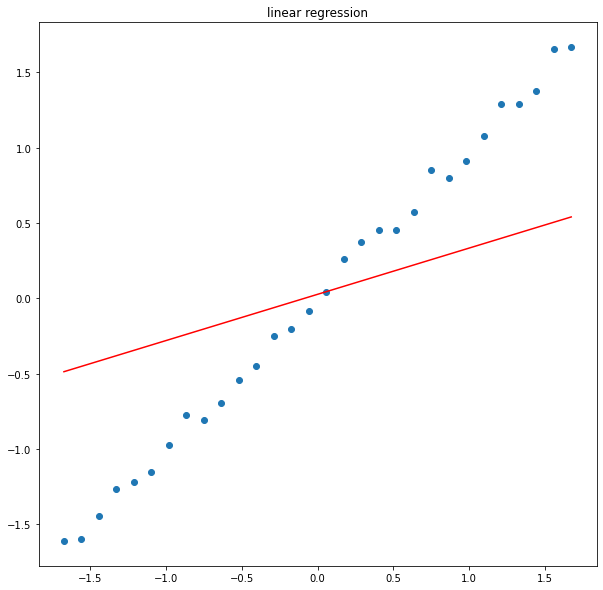

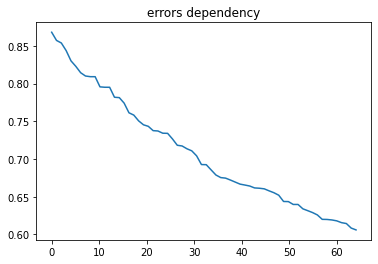

In [57]:
def ZNormalization(XM):
    X = XM.T
    for i in range(1, N + 1):
        X[i] = (X[i] - np.mean(X[i])) / np.std(X[i])
    return X.T

# print(XM)
runSGD(TypeOfOptimisation.none, withNormalization=True)

# Задание 3

### Метод моментов

102.00666666666667 3.0455090644433227
actual coefficients:      [2. 1. 4. 2.]
calculated coefficients:  [102.03004511  20.40361756  20.40361756  20.40361756]
number of iterations:     593
0.8571891205329157 0.5248096875151103
actual coefficients:      [-0.22941573 -1.14707867  1.60591014 -0.22941573]
calculated coefficients:  [-0.00790871  0.13345747  0.13345747  0.13345747]
number of iterations:     77


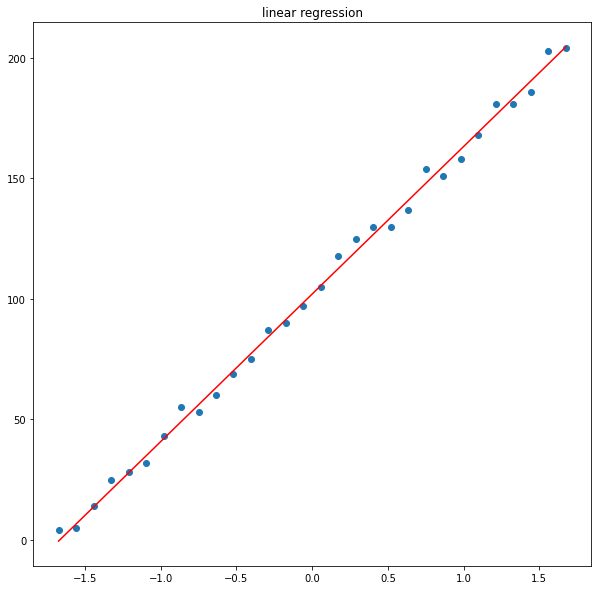

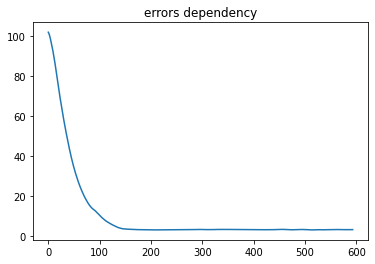

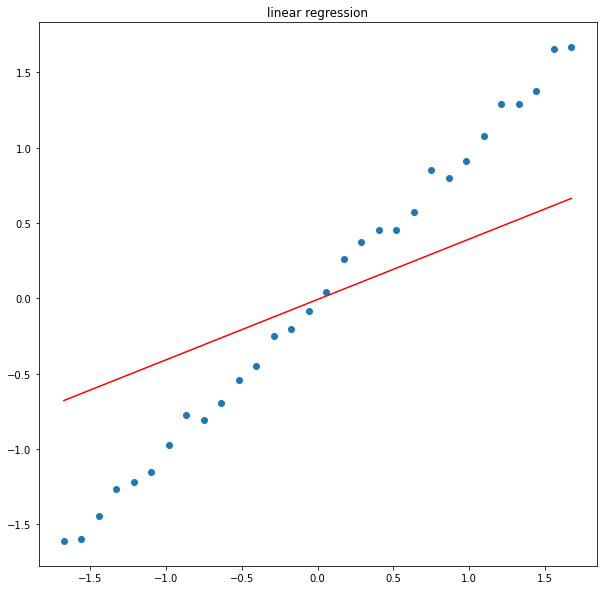

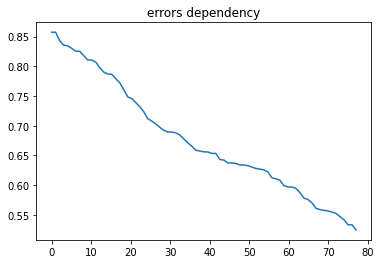

In [58]:
gamma = 0.9

runSGD(TypeOfOptimisation.momentum, withNormalization=False)
runSGD(TypeOfOptimisation.momentum, withNormalization=True)
